In [2]:
#Data Preprocessing

#hot-encode non-numerical data and drop descriptive data.

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from datetime import datetime, timedelta
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('insurance_claims_mendeley.csv')


columns_to_drop = ['policy_csl', 'insured_occupation', 'insured_hobbies', 'incident_severity', 'incident_city', 'incident_location', 'auto_make', 'auto_model', '_c39']
df = df.drop(columns=columns_to_drop)

columns_to_encode = ['incident_type', 'collision_type']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_cols = encoder.fit_transform(df[columns_to_encode])

feature_names = encoder.get_feature_names_out(columns_to_encode)

encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

processed_df = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)
#manually map other important dataas
processed_df['fraud_reported'] = processed_df['fraud_reported'].map({'Y': 1, 'N': 0})
processed_df['authorities_contacted'] = processed_df['authorities_contacted'].apply(lambda x: 0 if pd.isna(x) else 1)
processed_df['policy_bind_date'] = pd.to_datetime(processed_df['policy_bind_date'], errors='coerce')
processed_df['policy_year'] = processed_df['policy_bind_date'].dt.year

insurance_numeric = processed_df.select_dtypes(include=['number']).copy()



processed_df.to_csv('processed_insurance_claims.csv', index=False)

#Calculate mean,median,mode
summary = insurance_numeric.agg(['mean', 'median']).transpose()

mode_values = {}
for col in insurance_numeric.columns:
    non_na_values = insurance_numeric[col].dropna()
    if not non_na_values.empty: 
        try:
            mode_values[col] = stats.mode(non_na_values, keepdims=True).mode[0]  # Updated syntax
        except Exception as e:
            mode_values[col] = None 
    else:
        mode_values[col] = None 


summary['Mode'] = summary.index.map(mode_values)
print(summary)
insurance_dupe = insurance_numeric.duplicated()
missing_values = insurance_numeric.isnull().sum()
insurance_numeric.describe()
processed_df['fraud_reported']




                                                mean    median       Mode
months_as_customer                      2.039540e+02     199.5     194.00
age                                     3.894800e+01      38.0      43.00
policy_number                           5.462386e+05  533135.0  100804.00
policy_deductable                       1.136000e+03    1000.0    1000.00
policy_annual_premium                   1.256406e+03    1257.2    1073.83
umbrella_limit                          1.101000e+06       0.0       0.00
insured_zip                             5.012145e+05  466445.5  431202.00
capital-gains                           2.512610e+04       0.0       0.00
capital-loss                           -2.679370e+04  -23250.0       0.00
authorities_contacted                   9.090000e-01       1.0       1.00
incident_hour_of_the_day                1.164400e+01      12.0      17.00
number_of_vehicles_involved             1.839000e+00       1.0       1.00
bodily_injuries                       

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

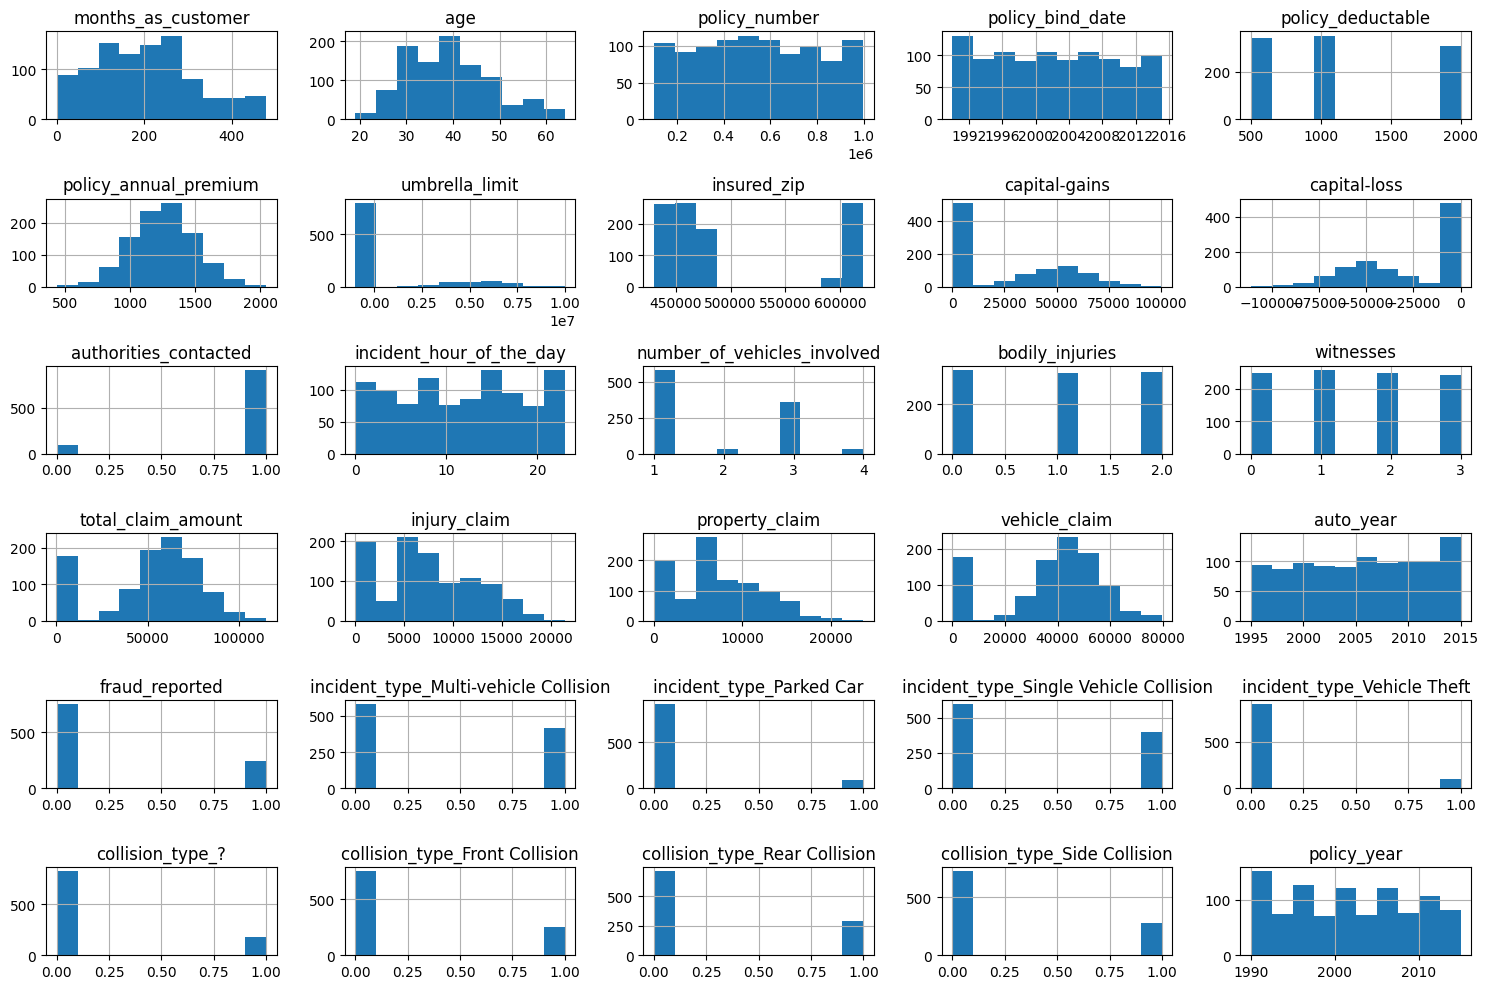

In [3]:
#Overview of plots to identify any interesting distributions.
hist = processed_df.hist(figsize=(15, 10)) 
plt.tight_layout()  # Automatically adjust subplot spacing
plt.show()



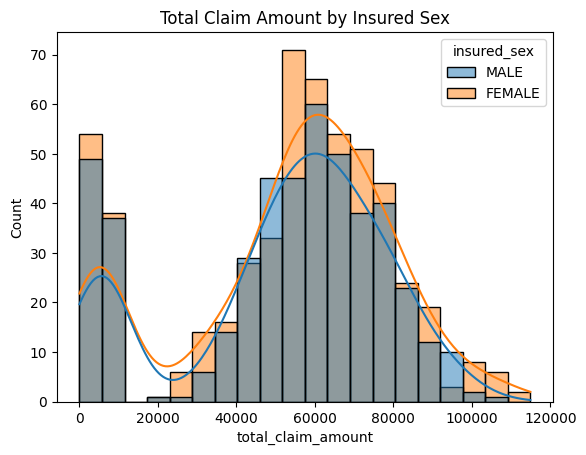

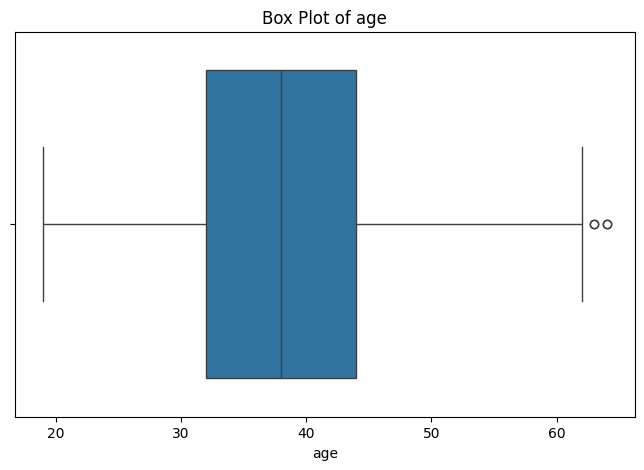

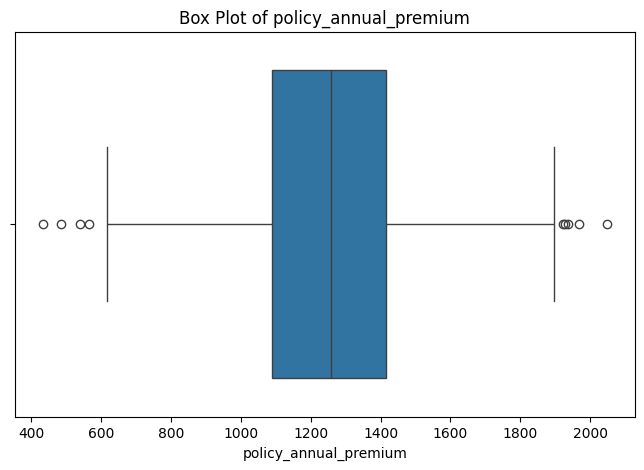

age:
  Mean: 38.948
  Median: 38.0
  Mode: 43

policy_annual_premium:
  Mean: 1256.4061499999998
  Median: 1257.1999999999998
  Mode: 1073.83

total_claim_amount:
  Mean: 52761.94
  Median: 58055.0
  Mode: 59400

injury_claim:
  Mean: 7433.42
  Median: 6775.0
  Mode: 0

property_claim:
  Mean: 7399.57
  Median: 6750.0
  Mode: 0

vehicle_claim:
  Mean: 37928.95
  Median: 42100.0
  Mode: 5040



In [4]:
sns.histplot(data=df, x='total_claim_amount', hue='insured_sex', kde=True)
plt.title('Total Claim Amount by Insured Sex')
plt.show()

target = ['age', 'policy_annual_premium']

for col in target:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


# Find means, medians, and modes.
target = ['age', 'policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']

results = {}
for col in target:
    mean_value = processed_df[col].mean()
    median_value = processed_df[col].median()
    mode_value = processed_df[col].mode().iloc[0]  # Mode can have multiple values; take the first one
    results[col] = {'Mean': mean_value, 'Median': median_value, 'Mode': mode_value}

for col, stats in results.items():
    print(f"{col}:")
    print(f"  Mean: {stats['Mean']}")
    print(f"  Median: {stats['Median']}")
    print(f"  Mode: {stats['Mode']}\n")

In [5]:
#BiVariate Analysis
save_fig = sns.pairplot(processed_df)
save_fig.savefig('output.png')
target = ['age', 'policy_annual_premium', 'total_claim_amount', 'injury_claim', 'fraud_reported']

if all(column in processed_df.columns for column in target):
    # Perform pair plot on the specified columns
    sns.pairplot(processed_df[target])
    plt.figure(figsize=(12, 6))
    plt.show()
 

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x746c1a7ee8e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

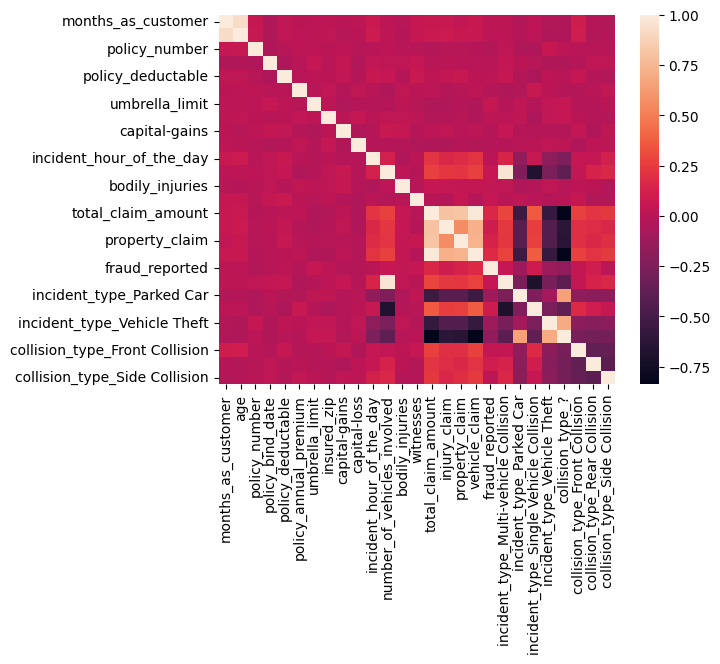

months_as_customer                        0.020544
age                                       0.012143
policy_number                            -0.029443
policy_bind_date                         -0.001254
policy_deductable                         0.014817
policy_annual_premium                    -0.014480
umbrella_limit                            0.058622
insured_zip                               0.019368
capital-gains                            -0.019173
capital-loss                             -0.014863
incident_hour_of_the_day                  0.004316
number_of_vehicles_involved               0.051839
bodily_injuries                           0.033877
witnesses                                 0.049497
total_claim_amount                        0.163651
injury_claim                              0.090975
property_claim                            0.137835
vehicle_claim                             0.170049
fraud_reported                            1.000000
incident_type_Multi-vehicle Col

In [ ]:
columns_to_drop = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_relationship', 'incident_date', 'incident_state', 'authorities_contacted', 'property_damage', 'police_report_available', 'policy_year', 'auto_year']

processed_corr = processed_df.drop(columns=columns_to_drop).copy()
dataplot = sns.heatmap(processed_corr.corr())

# Displaying heatmap
plt.show()
print(processed_corr.corr()['fraud_reported'])


Fraud rates for each incident type:
incident_type_Multi-vehicle Collision: 27.21%
incident_type_Parked Car: 9.52%
incident_type_Single Vehicle Collision: 29.03%
incident_type_Vehicle Theft: 8.51%

The incident type most likely to have fraud reported is: incident_type_Single Vehicle Collision
Fraud rates by Incident type:
incident_type_Single Vehicle Collision: 29.03%
incident_type_Multi-vehicle Collision: 27.21%
incident_type_Parked Car: 9.52%
incident_type_Vehicle Theft: 8.51%


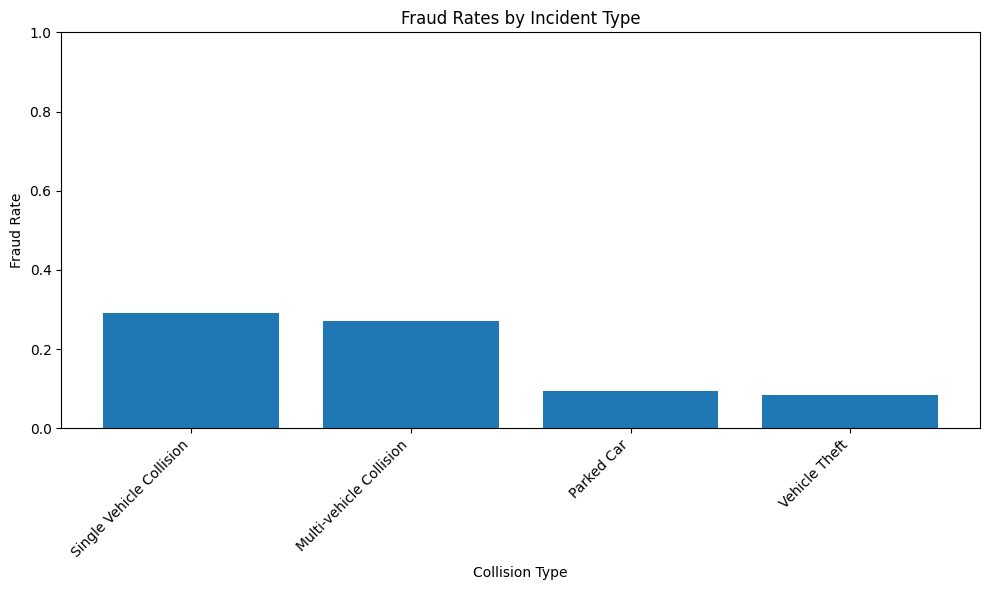

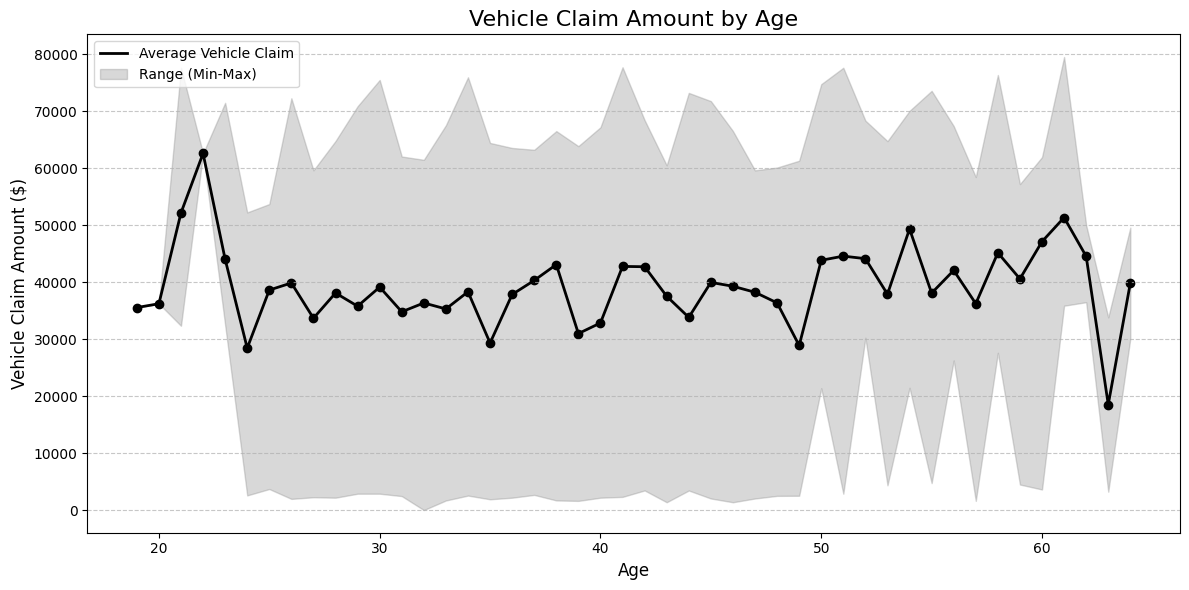

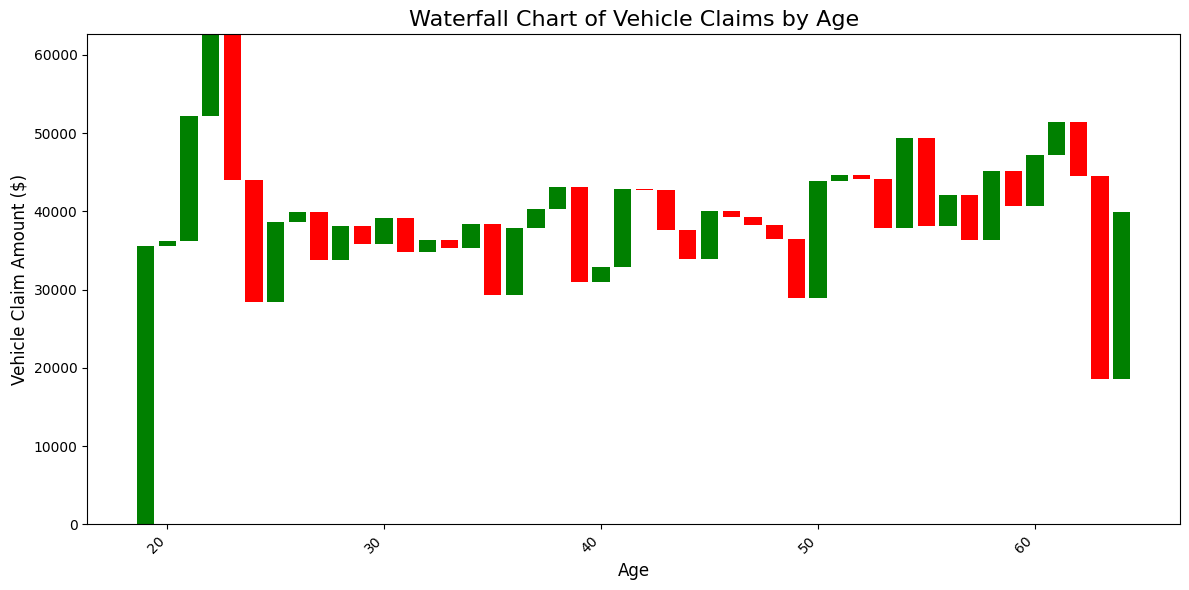

In [7]:

incident_types = ['incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
                  'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft']

fraud_rates = {}
for col in incident_types:
    fraud_rate = processed_df[processed_df[col] == 1]['fraud_reported'].mean()
    fraud_rates[col] = fraud_rate

most_fraudulent_incident = max(fraud_rates, key=fraud_rates.get)

print(f"Fraud rates for each incident type:")
for col, rate in fraud_rates.items():
    print(f"{col}: {rate:.2%}")
print(f"\nThe incident type most likely to have fraud reported is: {most_fraudulent_incident}")

fraud_rates = {}
for col in incident_types:
    fraud_rates[col] = processed_df[processed_df[col] == 1]['fraud_reported'].mean()

sorted_fraud_rates = sorted(fraud_rates.items(), key=lambda x: x[1], reverse=True)

print("Fraud rates by Incident type:")
for incident_types, rate in sorted_fraud_rates:
    print(f"{incident_types}: {rate:.2%}")

plt.figure(figsize=(10, 6))
plt.bar([col.replace('incident_type_', '') for col, rate in sorted_fraud_rates], 
        [rate for col, rate in sorted_fraud_rates])
plt.title('Fraud Rates by Incident Type')
plt.xlabel('Collision Type')
plt.ylabel('Fraud Rate')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

age_stats = df.groupby('age')['vehicle_claim'].agg(['mean', 'min', 'max']).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(age_stats['age'], age_stats['mean'], label='Average Vehicle Claim', color='black', linewidth=2)
plt.fill_between(age_stats['age'], age_stats['min'], age_stats['max'], color='gray', alpha=0.3, label='Range (Min-Max)')
plt.scatter(age_stats['age'], age_stats['mean'], color='black')  # Highlight average points

plt.title('Vehicle Claim Amount by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Vehicle Claim Amount ($)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

categories = age_stats['age']
values = age_stats['mean'].diff().fillna(age_stats['mean'][0])  # Use diff to calculate changes

# Calculate cumulative values for the waterfall chart
cumulative_values = np.cumsum(values)

# Create a blank series for the bottom of the bars
blank = cumulative_values.shift(1).fillna(0)

# Plotting the waterfall chart
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(values)):
    # Determine color: green for positive, red for negative
    color = 'green' if values.iloc[i] >= 0 else 'red'
    ax.bar(categories.iloc[i], values.iloc[i], bottom=blank.iloc[i], color=color)

# Add labels and titles
ax.set_title('Waterfall Chart of Vehicle Claims by Age', fontsize=16)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Vehicle Claim Amount ($)', fontsize=12)

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
#Data Conclusion
print(processed_df['insured_zip'].unique())
df_2= pd.read_csv('insurance_claims_mendeley.csv')

print(df_2['insured_hobbies'].unique())

[466132 468176 430632 608117 610706 478456 441716 603195 601734 600983
 462283 615561 432220 464652 476685 458733 619884 470610 472135 477670
 618845 442479 443920 453148 434733 613982 436984 607730 609837 432211
 473328 610393 614780 472248 603381 479224 430141 620757 615901 474615
 456446 470577 441648 433782 468104 459407 472573 433473 446326 435481
 477310 609930 603993 437818 478423 467784 606714 464691 431683 431725
 609216 452787 468767 435489 450149 458364 476458 602433 478575 449718
 463181 441992 452597 614417 472895 475847 476978 600648 608335 471600
 441175 603123 457767 618498 605486 617970 432934 456762 601748 607763
 436973 471300 453277 465100 603248 601112 438830 464959 439787 464839
 448984 440327 460742 446895 609374 451672 604450 432896 618929 451312
 605141 459504 432781 452748 618316 455365 470603 475292 467743 460675
 618123 607452 606352 603527 445601 603948 435758 611586 465263 617858
 607889 455689 450341 431277 454656 605169 444822 447442 474360 447925
 45158